## 1.DATA CHECK

In [1]:
#필요한 모듈 불러오기 

import pandas as pd
import numpy as np


import pandas_profiling as pp

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
%matplotlib inline


import scipy as sp
import seaborn as sns
from pandas import Series, DataFrame

import platform
sns.set(style='whitegrid', palette='muted')

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split  
from sklearn.decomposition import PCA
from imblearn.combine import SMOTETomek
from sklearn.neural_network import MLPClassifier 
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import SelectFromModel # 중요한 피쳐를 선택
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.under_sampling import NearMiss
from sklearn.metrics import accuracy_score
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import scikitplot as skplt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
import imblearn
from imblearn.over_sampling import RandomOverSampler

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')
import missingno as msno


Using TensorFlow backend.


In [2]:
#안전하게 원본을 건드리지말고 복사하기 

data=pd.read_csv('train.csv' ,encoding ='CP949')
testdata=pd.read_csv('test.csv' ,encoding ='CP949')
dataP = data.copy()
dataP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
custid       5000 non-null int64
gender       5000 non-null int64
총구매액         5000 non-null int64
구매건수         5000 non-null int64
평균구매가격       5000 non-null int64
평균할부개월수      5000 non-null float64
구매브랜드종류      5000 non-null int64
내점일수         5000 non-null int64
수입상품_구매비율    5000 non-null float64
주말방문비율       5000 non-null float64
가을_구매건수      4055 non-null float64
겨울_구매건수      4103 non-null float64
봄_구매건수       4311 non-null float64
여름_구매건수      3978 non-null float64
아침_구매건수      3558 non-null float64
저녁_구매건수      4033 non-null float64
점심_구매건수      4855 non-null float64
주구매코너        5000 non-null object
dtypes: float64(10), int64(7), object(1)
memory usage: 703.2+ KB


In [3]:
#object->int형으로 반환하기

dataP['주구매코너'] = dataP['주구매코너'].astype('category')
dataP['주구매코너'] = dataP['주구매코너'].cat.codes
dataP['주구매코너'].value_counts()

14    1306
24    1206
12     410
13     383
9      301
11     246
19     188
8      136
7       96
21      91
3       91
16      90
10      78
22      75
15      68
23      56
5       51
6       38
17      28
1       18
2       12
4       11
18       8
0        7
20       6
Name: 주구매코너, dtype: int64

## 1-1 NULL DATA값 반환하기

In [4]:
#null data값 체크하기
dataP.isnull().sum()

custid          0
gender          0
총구매액            0
구매건수            0
평균구매가격          0
평균할부개월수         0
구매브랜드종류         0
내점일수            0
수입상품_구매비율       0
주말방문비율          0
가을_구매건수       945
겨울_구매건수       897
봄_구매건수        689
여름_구매건수      1022
아침_구매건수      1442
저녁_구매건수       967
점심_구매건수       145
주구매코너           0
dtype: int64

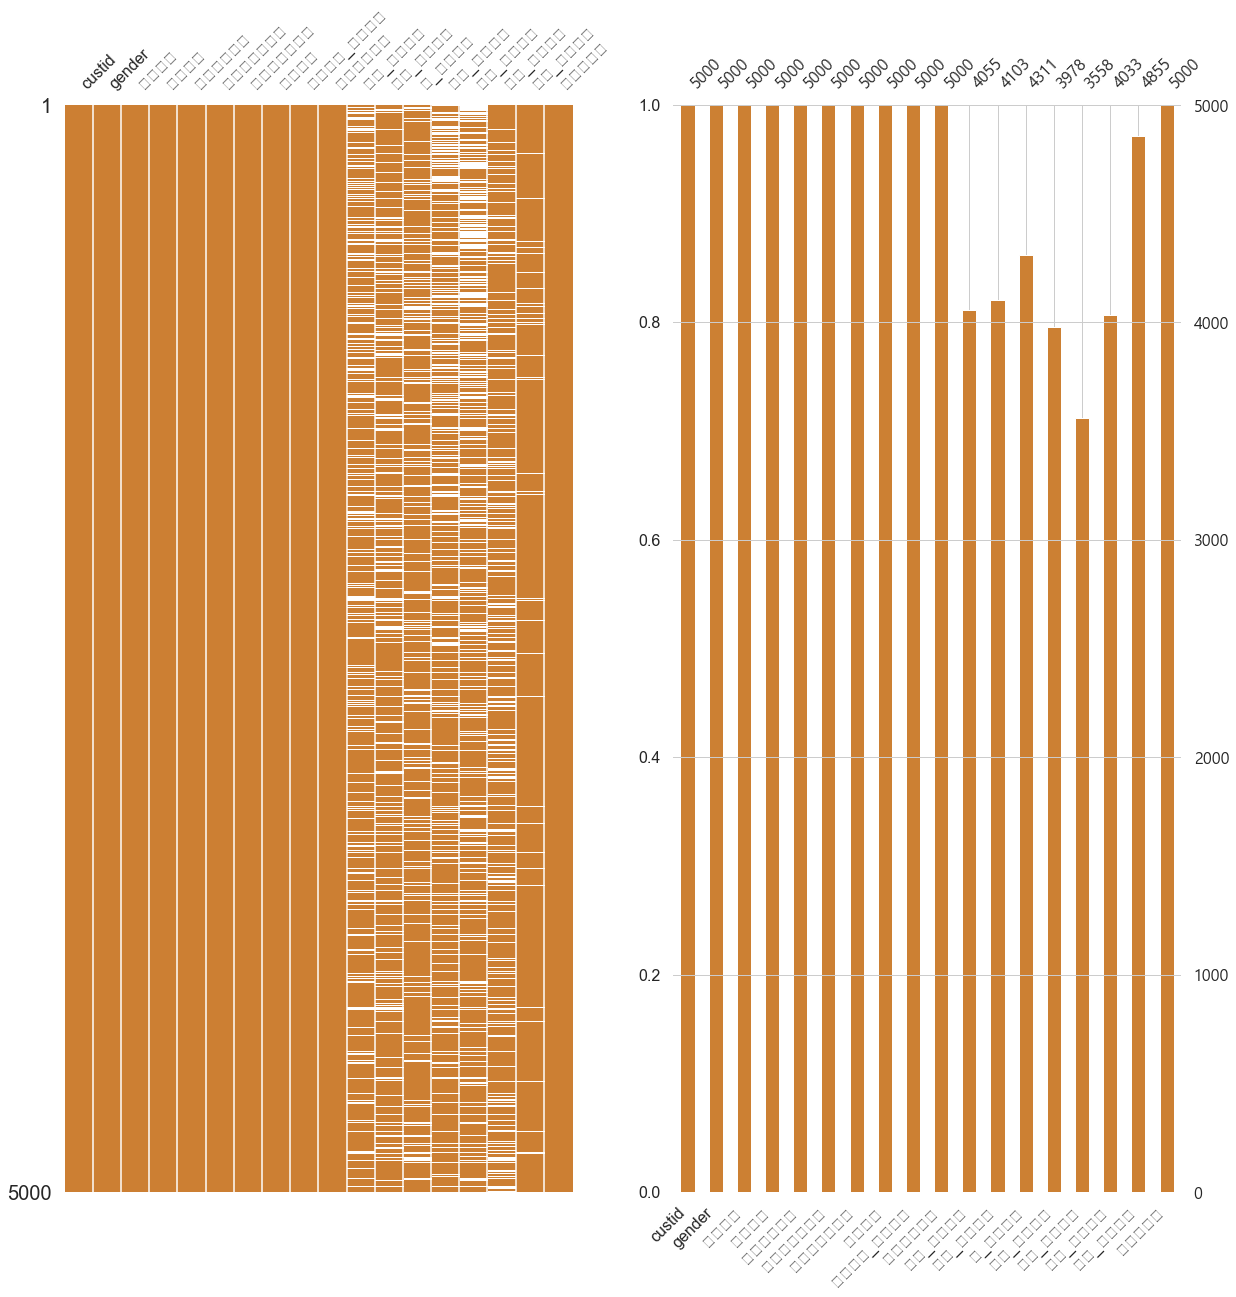

In [5]:
#null 값의 존재를 더쉽게 시각화하기

f,ax=plt.subplots(1,2,figsize=(20,20))

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False
ax[0]=msno.matrix(df=dataP.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2),ax=ax[0])


if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
msno.bar(df=dataP.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2),ax=ax[1])

In [6]:
#null값 비우기

dataP_drop = dataP.dropna(subset=['가을_구매건수','겨울_구매건수','봄_구매건수','여름_구매건수','아침_구매건수','저녁_구매건수','점심_구매건수' ])
dataP_drop.shape


(2235, 18)

In [7]:
dataP_drop.isnull().sum()

custid       0
gender       0
총구매액         0
구매건수         0
평균구매가격       0
평균할부개월수      0
구매브랜드종류      0
내점일수         0
수입상품_구매비율    0
주말방문비율       0
가을_구매건수      0
겨울_구매건수      0
봄_구매건수       0
여름_구매건수      0
아침_구매건수      0
저녁_구매건수      0
점심_구매건수      0
주구매코너        0
dtype: int64

In [8]:
#null값을 most_frequent방법으로 채워보쟝
con = ['가을_구매건수','겨울_구매건수','봄_구매건수','여름_구매건수','아침_구매건수','저녁_구매건수','점심_구매건수' ]
imputer_con = SimpleImputer(strategy="most_frequent")  
imputer_con.fit(dataP[con])
x = imputer_con.transform(dataP[con]); x

array([[ 1.,  9.,  6., ...,  1.,  6.,  9.],
       [ 1.,  5.,  4., ...,  3.,  1.,  6.],
       [ 7., 17., 12., ..., 10., 11., 15.],
       ...,
       [12.,  6.,  6., ..., 16.,  1., 21.],
       [ 6.,  4.,  2., ...,  1.,  2., 11.],
       [ 6.,  5., 10., ...,  8.,  5., 19.]])

In [9]:
dataP[con] = x
dataP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
custid       5000 non-null int64
gender       5000 non-null int64
총구매액         5000 non-null int64
구매건수         5000 non-null int64
평균구매가격       5000 non-null int64
평균할부개월수      5000 non-null float64
구매브랜드종류      5000 non-null int64
내점일수         5000 non-null int64
수입상품_구매비율    5000 non-null float64
주말방문비율       5000 non-null float64
가을_구매건수      5000 non-null float64
겨울_구매건수      5000 non-null float64
봄_구매건수       5000 non-null float64
여름_구매건수      5000 non-null float64
아침_구매건수      5000 non-null float64
저녁_구매건수      5000 non-null float64
점심_구매건수      5000 non-null float64
주구매코너        5000 non-null int8
dtypes: float64(10), int64(7), int8(1)
memory usage: 669.1 KB


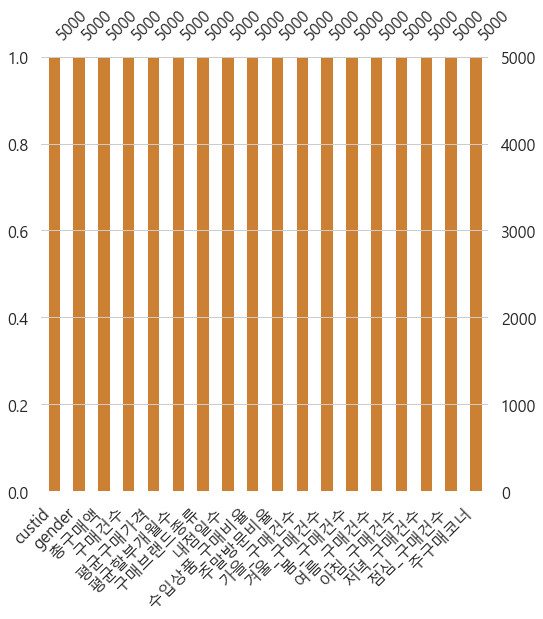

In [10]:
# 결측값 Most Frequent로 채움

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

    
msno.bar(df=dataP.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

## 1.2 Target label Check

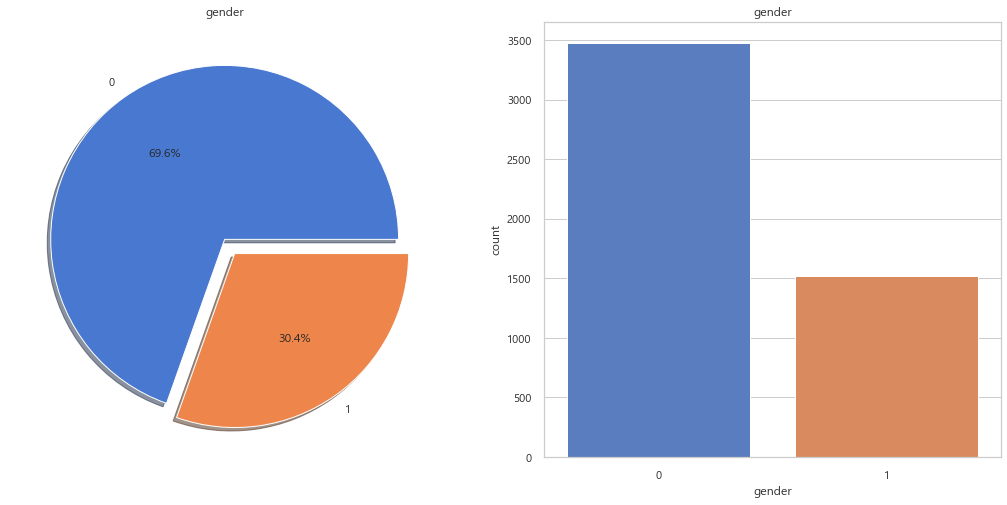

In [11]:
#남자와 여자의 비율보기

f,ax=plt.subplots(1,2,figsize=(18,8))
data['gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('gender')
ax[0].set_ylabel('')
sns.countplot('gender',data=data,ax=ax[1])
ax[1].set_title('gender')
plt.show()

## 2.Data Analysis

In [12]:
#데이터 상관관계를 확인

dataP.corr().gender.sort_values(ascending=False)

gender       1.000000
custid       0.262472
아침_구매건수      0.125613
여름_구매건수      0.101369
총구매액         0.099137
점심_구매건수      0.097330
구매건수         0.094022
가을_구매건수      0.087848
내점일수         0.084255
구매브랜드종류      0.083988
봄_구매건수       0.075762
평균구매가격       0.072181
겨울_구매건수      0.064887
주말방문비율       0.020457
평균할부개월수     -0.020066
저녁_구매건수     -0.021091
수입상품_구매비율   -0.021294
주구매코너       -0.039270
Name: gender, dtype: float64

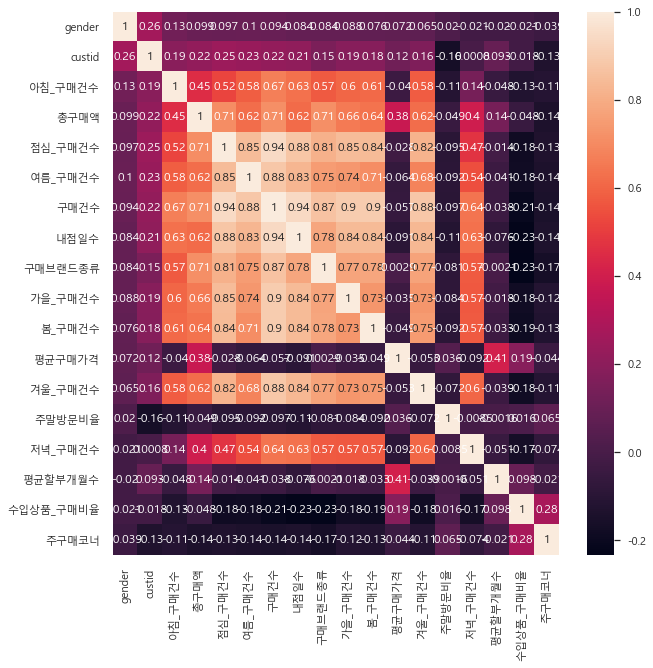

In [13]:

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False

heatmap_data = dataP[['gender', 'custid', '아침_구매건수', '총구매액', '점심_구매건수','여름_구매건수', '구매건수', '내점일수',
                        '구매브랜드종류','가을_구매건수','봄_구매건수','평균구매가격','겨울_구매건수','주말방문비율','저녁_구매건수',
                        '평균할부개월수','수입상품_구매비율','주구매코너' ]]

plt.figure(figsize=(10,10))
dataP.head()
sns.heatmap(heatmap_data.astype(float).corr(), annot=True)

## 구매코너
0.화장품
1.영캐주얼
2.장신구
3.피혁A
4.유니캐주얼
5.섬유
6.니트단품
7.일반식품
8.스포츠
9.캐릭터캐주얼
10.수입명품
11.기타바이어
12.피혁B
13.엘레강스캐주얼
14.트래디셔널캐주얼
15.가전
16.유아동복
17.정장셔츠
18.조리욕실
19.타운모피
20.가구
21.도자기크리스탈
22.문화완구
23.침구수예
24.디자이너부띠끄


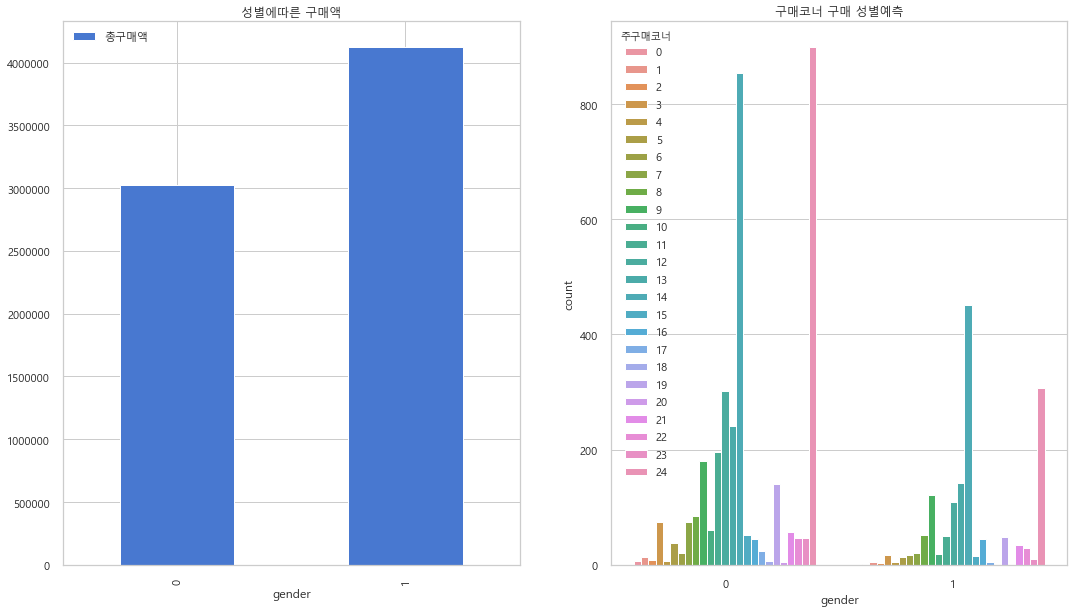

In [14]:
f, ax = plt.subplots(1, 2, figsize=(18, 10))
dataP[['gender', '총구매액']].groupby(['gender'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('성별에따른 구매액')
sns.countplot('gender', hue='주구매코너', data=dataP, ax=ax[1])
ax[1].set_title('구매코너 구매 성별예측')
plt.show()

Text(0.5, 1.0, '성별에따른 점심_구매건수')

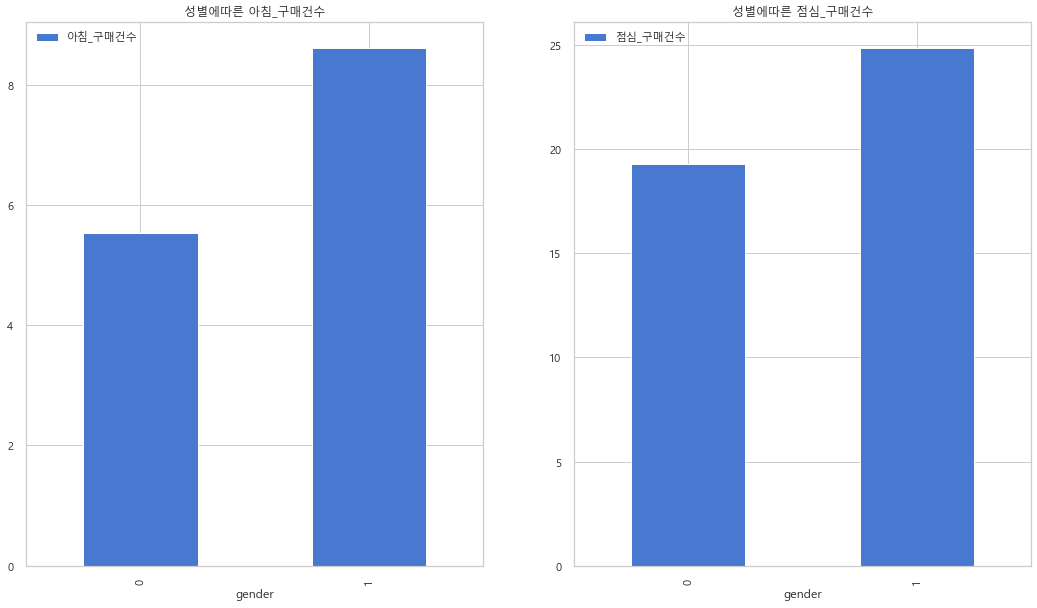

In [15]:
f, ax = plt.subplots(1, 2,  figsize=(18, 10))
dataP[['gender', '아침_구매건수']].groupby(['gender'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('성별에따른 아침_구매건수')
dataP[['gender', '점심_구매건수']].groupby(['gender'], as_index=True).mean().plot.bar(ax=ax[1])
ax[1].set_title('성별에따른 점심_구매건수')

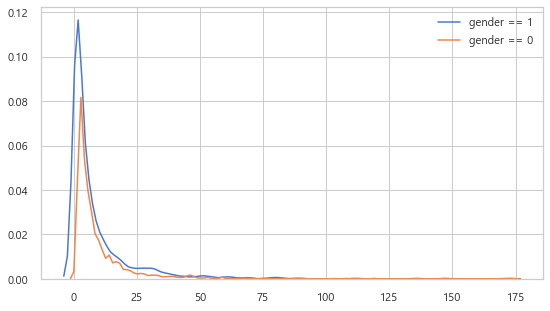

In [16]:
#아침에 구매건수가 많은사람은 남성.아침에 구매건수가 많을수록 남자일 확률이있다.
fig, ax = plt.subplots(1, 1, figsize = (9, 5))
sns.kdeplot(dataP[dataP['gender'] == 1]['아침_구매건수'], ax=ax)
sns.kdeplot(dataP[dataP['gender'] == 0]['아침_구매건수'], ax=ax)
plt.legend(['gender == 1', 'gender == 0'])
plt.show()

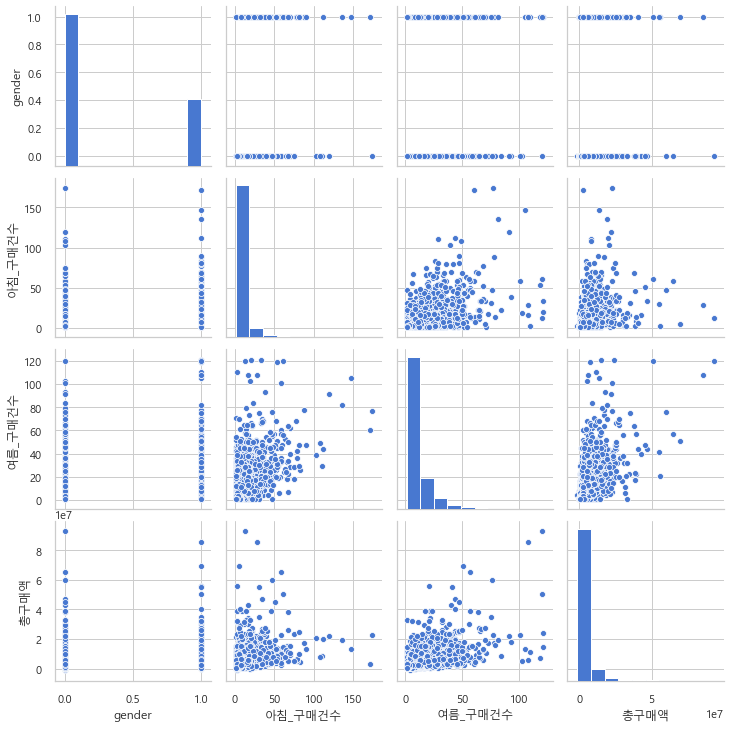

In [17]:
sns.pairplot(dataP[["gender", "아침_구매건수", "여름_구매건수", "총구매액"]])
plt.show()

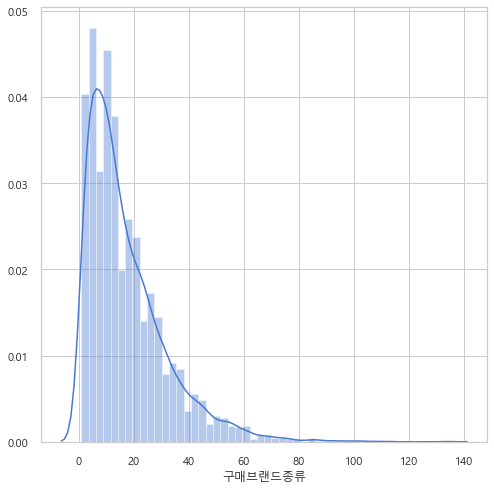

In [18]:
f, ax=plt.subplots(1, 1, figsize=(8,8))

g1 = sns.distplot(dataP['구매브랜드종류'])

In [19]:
testdata.loc[testdata.구매브랜드종류.isnull(), '구매브랜드종류'] = testdata['구매브랜드종류'].mean()
# testset에 있는 nan value를 평균값으로 치환합니다.

dataP['구매브랜드종류'] = dataP['구매브랜드종류'].map(lambda i : np.log(i) if i>0 else 0)
testdata['구매브랜드종류'] = testdata['구매브랜드종류'].map(lambda i : np.log(i) if i>0 else 0)

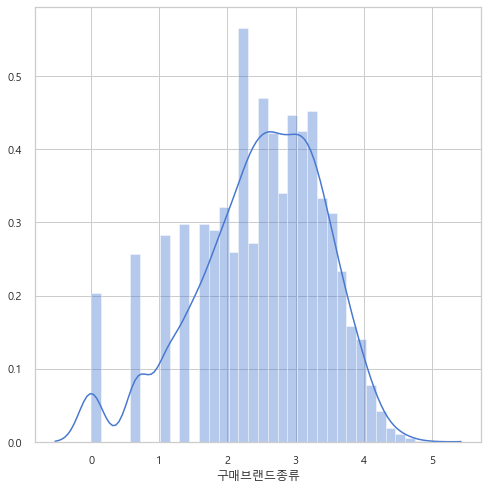

In [20]:
f, ax=plt.subplots(1, 1, figsize=(8,8))

g = sns.distplot(dataP['구매브랜드종류'])

In [21]:
dataP['평균할부개월수']=dataP['평균할부개월수'].round(0)
dataP['구매브랜드종류']=dataP['구매브랜드종류'].round(0)

In [22]:
columns = [ '가을_구매건수',
    '봄_구매건수' ,
    '평균구매가격'  ,
    '겨울_구매건수' ,  
    '주말방문비율'  ,  
    '저녁_구매건수'   , 
    '평균할부개월수' ,
    '수입상품_구매비율',
          '여름_구매건수',
          '내점일수',
          '구매건수',
          'gender',
           'custid',
           '아침_구매건수',
           
          
          ]
mdx = dataP.drop(columns, axis=1)
mdx.head()

,총구매액,구매브랜드종류,점심_구매건수,주구매코너
0,680100,2.0,9.0,24
1,353450,2.0,6.0,11
2,5671400,3.0,15.0,15
3,1964000,3.0,10.0,24
4,885000,2.0,2.0,22


## 3.데이터나누기

In [23]:

dfy = dataP['gender']                    # class variable
X_train, X_test, y_train, y_test = train_test_split(mdx, dfy, test_size=0.25, random_state=0)
display(X_train.shape, X_test.shape)
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
pca = PCA(n_components=1)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

(3750, 4)

(1250, 4)

## 4.학습시키기
1.svc\
2.mlptree\
3.Logistic Regression\
4.KNeighborsClassifier tree\
5.DecisionTreeClassifier\
6.GradientBoostingClassifier

In [24]:
svm = SVC(random_state=0,C=100)
svm.fit(X_train, y_train)

display(svm.score(X_train, y_train))
display(svm.score(X_test, y_test))

0.6946666666666667

0.704

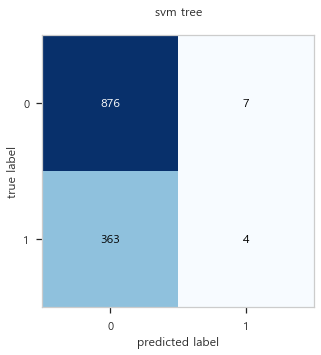

In [25]:
pred_model1 = svm.predict(X_test)
CM = confusion_matrix(y_test, pred_model1)
f, ax= plot_confusion_matrix(conf_mat=CM , figsize=(5, 5))
plt.title("svm tree")
plt.show()

In [27]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

display(mlp.score(X_train, y_train))
display(mlp.score(X_test, y_test))

0.6922666666666667

0.7072

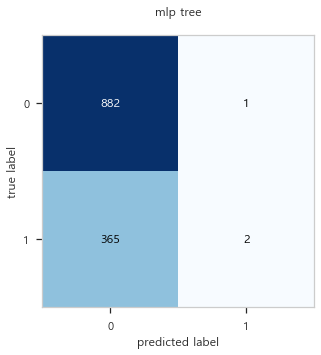

In [28]:
pred_model2 = mlp.predict(X_test)
CM = confusion_matrix(y_test, pred_model2)
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.title("mlp tree")
plt.show()

In [29]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

display(lr.score(X_train, y_train))
display(lr.score(X_test, y_test))

0.692

0.7072

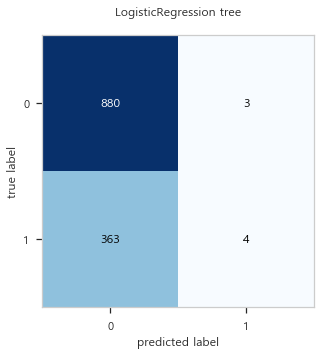

In [30]:
pred_model3 = lr.predict(X_test)
CM = confusion_matrix(y_test, pred_model3)
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.title("LogisticRegression tree")
plt.show()

In [31]:
clf=KNeighborsClassifier(n_neighbors=200)
clf.fit(X_train,y_train).score(X_test, y_test)

display(clf.score(X_train, y_train))
display(clf.score(X_test, y_test))

0.6922666666666667

0.7064

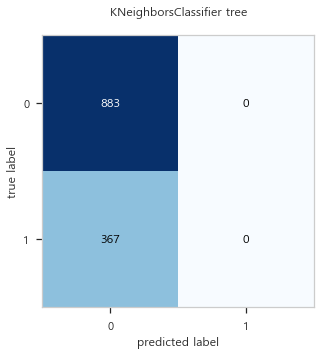

In [32]:
pred_model4 = clf.predict(X_test)
CM = confusion_matrix(y_test, pred_model4)
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.title("KNeighborsClassifier tree")
plt.show()

In [33]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train).score(X_test, y_test)

display(tree.score(X_train, y_train))
display(tree.score(X_test, y_test))

0.9984

0.5568

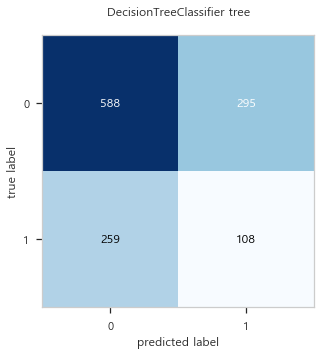

In [34]:
pred_model5 = tree.predict(X_test)
CM = confusion_matrix(y_test, pred_model5)
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.title("DecisionTreeClassifier tree")
plt.show()

In [35]:
gboost = GradientBoostingClassifier()
gboost.fit(X_train,y_train).score(X_test, y_test)

display(gboost.score(X_train, y_train))
display(gboost.score(X_test, y_test))

0.7125333333333334

0.6936

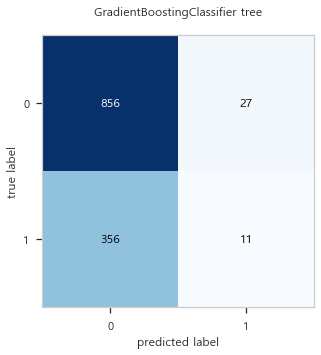

In [36]:
pred_model6 = gboost.predict(X_test)
CM = confusion_matrix(y_test, pred_model6)
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.title("GradientBoostingClassifier tree")
plt.show()

In [37]:
voting = VotingClassifier(
    estimators = [('svc', svm), ('mlp', mlp), ('lr', lr), ('clf', clf),('tree', tree),('gboost', gboost)],
    voting = 'hard')


for clf in (svm, mlp, lr, clf, tree, gboost, voting) :
    clf.fit(X_train, y_train)
    print(clf.__class__.__name__, 
          accuracy_score(y_test, clf.predict(X_test)))

SVC 0.704
MLPClassifier 0.708
LogisticRegression 0.7072
KNeighborsClassifier 0.7064
DecisionTreeClassifier 0.5568
GradientBoostingClassifier 0.6936
VotingClassifier 0.7064


## 5.예측률 높이기
5-1.다른모델사용해보기\
5-2. SMOTETomek 사용하기\
5-3.oversampling,undersampling,nearsampling해보기\
5-4.pipline,GridSearchCV

In [38]:
#5-1.다른알고리즘사용해보기

In [39]:
#bagging
bagging = BaggingClassifier(base_estimator=KNeighborsClassifier(), random_state=0, n_estimators=200)
bagging.fit(X_train, y_train).score(X_test, y_test)

0.628

In [40]:
## Ada Boost
ada = AdaBoostClassifier(n_estimators=200, random_state=0)
ada.fit(X_train, y_train).score(X_test, y_test)

0.6952

In [41]:
#5-2.SMOTETomek

In [42]:
smotemek = SMOTETomek(sampling_strategy='auto')
X_train_smt, y_train_smt = smotemek.fit_sample(X_train, y_train)

In [43]:
voting = VotingClassifier(
    estimators = [('svc', svm), ('mlp', mlp), ('lr', lr), ('clf', clf),('tree', tree),('gboost', gboost),('bagging', bagging),('ada', ada)],
    voting = 'hard')

for clf in (svm, mlp, lr, clf, tree, gboost, bagging,ada, voting) :
    clf.fit(X_train_smt, y_train_smt)
    print(clf.__class__.__name__, 
          accuracy_score(y_test, clf.predict(X_test)))

#예측률 올리기 실패!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

SVC 0.6256
MLPClassifier 0.6136
LogisticRegression 0.5512
VotingClassifier 0.624
DecisionTreeClassifier 0.528
GradientBoostingClassifier 0.556
BaggingClassifier 0.532
AdaBoostClassifier 0.5488
VotingClassifier 0.6264


In [44]:
#5-3.oversampling해보기

In [45]:
oversample = RandomOverSampler(sampling_strategy=0.5)
X_over, y_over = oversample.fit_resample(X_train, y_train)

for clf in (svm, mlp, lr, clf, tree, gboost, bagging,ada, voting) :
    clf.fit(X_over, y_over)
    print(clf.__class__.__name__, 
          accuracy_score(y_test, clf.predict(X_test)))

SVC 0.7032
MLPClassifier 0.708
LogisticRegression 0.7064
VotingClassifier 0.7032
DecisionTreeClassifier 0.5568
GradientBoostingClassifier 0.688
BaggingClassifier 0.6168
AdaBoostClassifier 0.6968
VotingClassifier 0.7032


In [46]:
near = NearMiss(sampling_strategy="not minority")
x_train_near, y_train_near = near.fit_sample(X_over, y_over)

for clf in (svm, mlp, lr, clf, tree, gboost, bagging,ada, voting) :
    clf.fit(x_train_near, y_train_near)
    print(clf.__class__.__name__, 
          accuracy_score(y_test, clf.predict(X_test)))

SVC 0.6384
MLPClassifier 0.6416
LogisticRegression 0.5264
VotingClassifier 0.636
DecisionTreeClassifier 0.44
GradientBoostingClassifier 0.548
BaggingClassifier 0.4656
AdaBoostClassifier 0.5224
VotingClassifier 0.636


In [47]:
under_sampler = RandomUnderSampler()

# fit the object to the training data.
X_train_under, y_train_under = under_sampler.fit_sample(X_train, y_train)
for clf in (svm, mlp, lr, clf, tree, gboost, bagging,ada, voting) :
    clf.fit(x_train_near, y_train_near)
    print(clf.__class__.__name__, 
          accuracy_score(y_test, clf.predict(X_test)))

SVC 0.6384
MLPClassifier 0.6416
LogisticRegression 0.5264
VotingClassifier 0.636
DecisionTreeClassifier 0.44
GradientBoostingClassifier 0.548
BaggingClassifier 0.4656
AdaBoostClassifier 0.5224
VotingClassifier 0.6368


In [48]:
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])
pipe.fit(X_train, y_train).score(X_test, y_test)

0.7064

In [49]:
from sklearn.model_selection import GridSearchCV 
param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(
    grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))


Best cross-validation accuracy: 0.69
Test set score: 0.71
Best parameters: {'svm__C': 0.001, 'svm__gamma': 0.001}


In [77]:
last =pd.read_csv('test.csv' ,encoding ='CP949')

In [78]:
last.head()

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,100001,3439000,25,137560,2.2,19,16,12.0,31.2,5.0,4.0,7.0,9.0,13.0,1.0,11.0,장신구
1,100002,2073090,39,53156,1.3,18,29,0.0,20.7,13.0,8.0,10.0,8.0,4.0,10.0,25.0,유아동복
2,100003,1303800,22,59264,1.8,14,12,0.0,41.7,6.0,7.0,3.0,6.0,3.0,1.0,18.0,유아동복
3,100004,6696522,46,145577,1.7,31,22,37.0,50.0,5.0,15.0,9.0,17.0,NaN,4.0,42.0,수입명품
4,100005,1297640,26,49909,2.3,13,9,11.5,22.2,18.0,NaN,5.0,3.0,NaN,NaN,26.0,스포츠


In [79]:

last['주구매코너'] = last['주구매코너'].astype('category')
last['주구매코너'] = last['주구매코너'].cat.codes
last['주구매코너'].value_counts()

14    1293
24    1191
12     416
13     415
9      302
11     246
19     193
8      125
3      114
7       90
16      87
21      83
15      76
10      66
23      61
22      61
6       43
5       41
17      37
18      14
1       12
2       10
20      10
4       10
0        4
Name: 주구매코너, dtype: int64

In [80]:
#null값을 most_frequent방법으로 채워보쟝
con = ['가을_구매건수','겨울_구매건수','봄_구매건수','여름_구매건수','아침_구매건수','저녁_구매건수','점심_구매건수' ]
imputer_con = SimpleImputer(strategy="most_frequent")  
imputer_con.fit(last[con])
x = imputer_con.transform(last[con]); x

array([[ 5.,  4.,  7., ..., 13.,  1., 11.],
       [13.,  8., 10., ...,  4., 10., 25.],
       [ 6.,  7.,  3., ...,  3.,  1., 18.],
       ...,
       [ 4.,  1.,  6., ...,  1.,  1., 12.],
       [ 1.,  7.,  4., ...,  2.,  4.,  8.],
       [23., 20.,  9., ..., 11.,  4., 61.]])

In [81]:
last.head()

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,100001,3439000,25,137560,2.2,19,16,12.0,31.2,5.0,4.0,7.0,9.0,13.0,1.0,11.0,15
1,100002,2073090,39,53156,1.3,18,29,0.0,20.7,13.0,8.0,10.0,8.0,4.0,10.0,25.0,13
2,100003,1303800,22,59264,1.8,14,12,0.0,41.7,6.0,7.0,3.0,6.0,3.0,1.0,18.0,13
3,100004,6696522,46,145577,1.7,31,22,37.0,50.0,5.0,15.0,9.0,17.0,NaN,4.0,42.0,8
4,100005,1297640,26,49909,2.3,13,9,11.5,22.2,18.0,NaN,5.0,3.0,NaN,NaN,26.0,9


In [85]:
last_drop = last.dropna(subset=['가을_구매건수','겨울_구매건수','봄_구매건수','여름_구매건수','아침_구매건수','저녁_구매건수','점심_구매건수' ])
last_drop.head()

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,100001,3439000,25,137560,2.2,19,16,12.0,31.2,5.0,4.0,7.0,9.0,13.0,1.0,11.0,15
1,100002,2073090,39,53156,1.3,18,29,0.0,20.7,13.0,8.0,10.0,8.0,4.0,10.0,25.0,13
2,100003,1303800,22,59264,1.8,14,12,0.0,41.7,6.0,7.0,3.0,6.0,3.0,1.0,18.0,13
8,100009,3889520,44,88398,1.6,30,21,13.6,38.1,5.0,17.0,5.0,17.0,8.0,6.0,30.0,9
10,100011,5643401,82,68822,2.2,32,40,20.7,37.5,19.0,20.0,9.0,34.0,9.0,9.0,64.0,14


In [106]:
dataP.head()

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,18,0,680100,15,45340,2.0,2.0,10,26.7,100.0,1.0,9.0,6.0,1.0,1.0,6.0,9.0,24
1,21,0,353450,9,39272,1.0,2.0,8,11.1,37.5,1.0,5.0,4.0,1.0,3.0,1.0,6.0,11
2,23,0,5671400,36,157539,3.0,3.0,16,5.6,37.5,7.0,17.0,12.0,1.0,10.0,11.0,15.0,15
3,26,0,1964000,28,70143,1.0,3.0,14,39.3,28.6,5.0,8.0,15.0,1.0,1.0,18.0,10.0,24
4,35,0,885000,5,177000,6.0,2.0,2,0.0,100.0,1.0,1.0,5.0,1.0,1.0,5.0,2.0,22


In [86]:
last_drop.head()

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,100001,3439000,25,137560,2.2,19,16,12.0,31.2,5.0,4.0,7.0,9.0,13.0,1.0,11.0,15
1,100002,2073090,39,53156,1.3,18,29,0.0,20.7,13.0,8.0,10.0,8.0,4.0,10.0,25.0,13
2,100003,1303800,22,59264,1.8,14,12,0.0,41.7,6.0,7.0,3.0,6.0,3.0,1.0,18.0,13
8,100009,3889520,44,88398,1.6,30,21,13.6,38.1,5.0,17.0,5.0,17.0,8.0,6.0,30.0,9
10,100011,5643401,82,68822,2.2,32,40,20.7,37.5,19.0,20.0,9.0,34.0,9.0,9.0,64.0,14


In [107]:
last_drop.isnull().sum()

custid       0
총구매액         0
구매건수         0
평균구매가격       0
평균할부개월수      0
구매브랜드종류      0
내점일수         0
수입상품_구매비율    0
주말방문비율       0
가을_구매건수      0
겨울_구매건수      0
봄_구매건수       0
여름_구매건수      0
아침_구매건수      0
저녁_구매건수      0
점심_구매건수      0
주구매코너        0
gender       0
dtype: int64

In [108]:
last_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2286 entries, 0 to 4999
Data columns (total 18 columns):
custid       2286 non-null int64
총구매액         2286 non-null int64
구매건수         2286 non-null int64
평균구매가격       2286 non-null int64
평균할부개월수      2286 non-null float64
구매브랜드종류      2286 non-null int64
내점일수         2286 non-null int64
수입상품_구매비율    2286 non-null float64
주말방문비율       2286 non-null float64
가을_구매건수      2286 non-null float64
겨울_구매건수      2286 non-null float64
봄_구매건수       2286 non-null float64
여름_구매건수      2286 non-null float64
아침_구매건수      2286 non-null float64
저녁_구매건수      2286 non-null float64
점심_구매건수      2286 non-null float64
주구매코너        2286 non-null int8
gender       2286 non-null object
dtypes: float64(10), int64(6), int8(1), object(1)
memory usage: 323.7+ KB


In [95]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

display(mlp.score(X_train, y_train))
display(mlp.score(X_test, y_test))

In [109]:
last_drop['gender'] = '0'

In [110]:
last_drop.head()

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,gender
0,100001,3439000,25,137560,2.2,19,16,12.0,31.2,5.0,4.0,7.0,9.0,13.0,1.0,11.0,15,0
1,100002,2073090,39,53156,1.3,18,29,0.0,20.7,13.0,8.0,10.0,8.0,4.0,10.0,25.0,13,0
2,100003,1303800,22,59264,1.8,14,12,0.0,41.7,6.0,7.0,3.0,6.0,3.0,1.0,18.0,13,0
8,100009,3889520,44,88398,1.6,30,21,13.6,38.1,5.0,17.0,5.0,17.0,8.0,6.0,30.0,9,0
10,100011,5643401,82,68822,2.2,32,40,20.7,37.5,19.0,20.0,9.0,34.0,9.0,9.0,64.0,14,0


In [114]:
prediction = gboost.predict(X_test)
y_test['gender'] = prediction
y_test.to_csv('./gender.csv', index=False)